In [2]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, 'analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# WTF is wrong with $l_\mu$?

In [3]:
overlay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_vertices.csv')
mup = overlay[overlay['1mu-1p']==True]

In [35]:
for col in mup_bad_l_mu.columns: print col

Unnamed: 0
run
subrun
event
vertex_id
x
y
z
track_id
PIDa_muCandidate
PIDa_pCandidate
l_muCandidate
l_pCandidate
l_mu-l_p
pid_PIDa_muCandidate
pid_PIDa_pCandidate
pid_PIDaYplane_muCandidate
pid_PIDaYplane_pCandidate
pidcali_PIDa_muCandidate
pidcali_PIDa_pCandidate
pidcali_PIDaYplane_muCandidate
pidcali_PIDaYplane_pCandidate
pidcali_Chi2ProtonYplane_muCandidate
pidcali_Chi2ProtonYplane_pCandidate
pidcali_Chi2MuonYplane_muCandidate
pidcali_Chi2MuonYplane_pCandidate
ClosestFlash_YZdistance_muCandidate
ClosestFlash_YZdistance_pCandidate
ClosestFlash_TotalPE_muCandidate
ClosestFlash_TotalPE_pCandidate
startx_muCandidate
starty_muCandidate
startz_muCandidate
startx_pCandidate
starty_pCandidate
startz_pCandidate
endx_muCandidate
endy_muCandidate
endz_muCandidate
endx_pCandidate
endy_pCandidate
endz_pCandidate
distance
delta_phi
delta_theta
theta_12
reco_Ev
reco_Q2
reco_Xb
reco_y
reco_W2
reco_Pt
reco_theta_pq
reco_Pmu
reco_Pmu_x
reco_Pmu_y
reco_Pmu_z
reco_Pmu_theta
reco_Pmu_phi
reco_Pp
reco_Pp

74051 mu-p, 51026 good l(mu) reconstruction 23025 bad l(mu) reco.


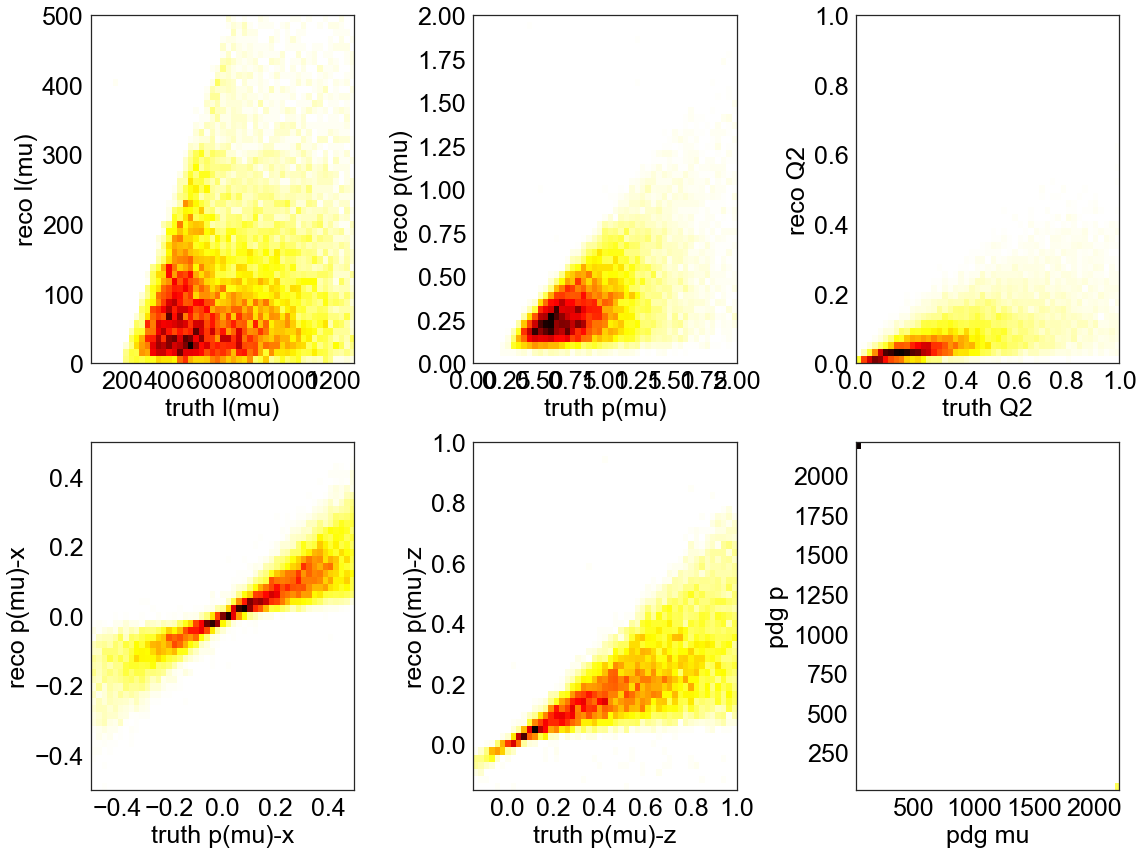

In [45]:
mup_good_l_mu = mup[np.abs(mup['truth_l_muCandidate']-mup['l_muCandidate'])<200]
mup_bad_l_mu = mup[np.abs(mup['truth_l_muCandidate']-mup['l_muCandidate'])>200]
print len(mup),'mu-p,',len(mup_good_l_mu),'good l(mu) reconstruction',len(mup_bad_l_mu),'bad l(mu) reco.'
draw_sam = mup_bad_l_mu
fig=plt.figure(figsize=(16,12))
plot_2d_hist(draw_sam['truth_l_muCandidate'],draw_sam['l_muCandidate'],xlabel='truth l(mu)',ylabel='reco l(mu)'
             ,bins=(linspace(50,1300,50),linspace(0,500,50)),ax=fig.add_subplot(2,3,1));
plot_2d_hist(draw_sam['truth_Pmu'],draw_sam['reco_Pmu'],xlabel='truth p(mu)',ylabel='reco p(mu)'
             ,bins=(linspace(0,2,50),linspace(0,2,50)),ax=fig.add_subplot(2,3,2));
plot_2d_hist(draw_sam['truth_Q2'],draw_sam['reco_Q2'],xlabel='truth Q2',ylabel='reco Q2'
             ,bins=(linspace(0,1,50),linspace(0,1,50)),ax=fig.add_subplot(2,3,3));
plot_2d_hist(draw_sam['truth_Pmu_x'],draw_sam['reco_Pmu_x'],xlabel='truth p(mu)-x',ylabel='reco p(mu)-x'
             ,bins=(linspace(-0.5,0.5,50),linspace(-0.5,0.5,50)),ax=fig.add_subplot(2,3,4));
plot_2d_hist(draw_sam['truth_Pmu_z'],draw_sam['reco_Pmu_z'],xlabel='truth p(mu)-z',ylabel='reco p(mu)-z'
             ,bins=(linspace(-0.15,1.,50),linspace(-0.15,1.,50)),ax=fig.add_subplot(2,3,5));
plot_2d_hist(draw_sam['startz_muCandidate'],draw_sam['endz_muCandidate'],xlabel='start z mu',ylabel='end z mu'
             ,bins=(linspace(-0.15,1000,50),linspace(-0.15,1000,50)),ax=fig.add_subplot(2,3,6));
plot_2d_hist(draw_sam['pdg_long'],draw_sam['pdg_short'],xlabel='pdg mu',ylabel='pdg p',
             ax=fig.add_subplot(2,3,6));




plt.tight_layout()

# event weight

In [2]:
ovrelay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates//prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_06_21_vertices.csv')
genie = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_06_21_genie.csv')

In [3]:
mup = ovrelay[ovrelay['1mu-1p']==True]

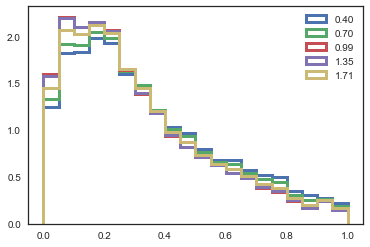

In [9]:
plt.hist(genie['truth_Q2'],weights=genie['evwgh_mA040'],bins=linspace(0,1,21),histtype='step',linewidth=3,normed=1,label='0.40');
plt.hist(genie['truth_Q2'],weights=genie['evwgh_mA070'],bins=linspace(0,1,21),histtype='step',linewidth=3,normed=1,label='0.70');
plt.hist(genie['truth_Q2'],weights=genie['evwgh_mA099'],bins=linspace(0,1,21),histtype='step',linewidth=3,normed=1,label='0.99');
plt.hist(genie['truth_Q2'],weights=genie['evwgh_mA135'],bins=linspace(0,1,21),histtype='step',linewidth=3,normed=1,label='1.35');
plt.hist(genie['truth_Q2'],weights=genie['evwgh_mA171'],bins=linspace(0,1,21),histtype='step',linewidth=3,normed=1,label='1.71');
plt.legend()

# Marco' flash-matching

In [40]:
ovrelay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/from_interactive/prodgenie_bnb_nu_uboone_overlay_mcc8_v9_vertices.csv')

In [41]:
mup = ovrelay[ovrelay['1mu-1p']==True]
cosmic = ovrelay[ovrelay['cosmic']==True]
print len(mup)

429


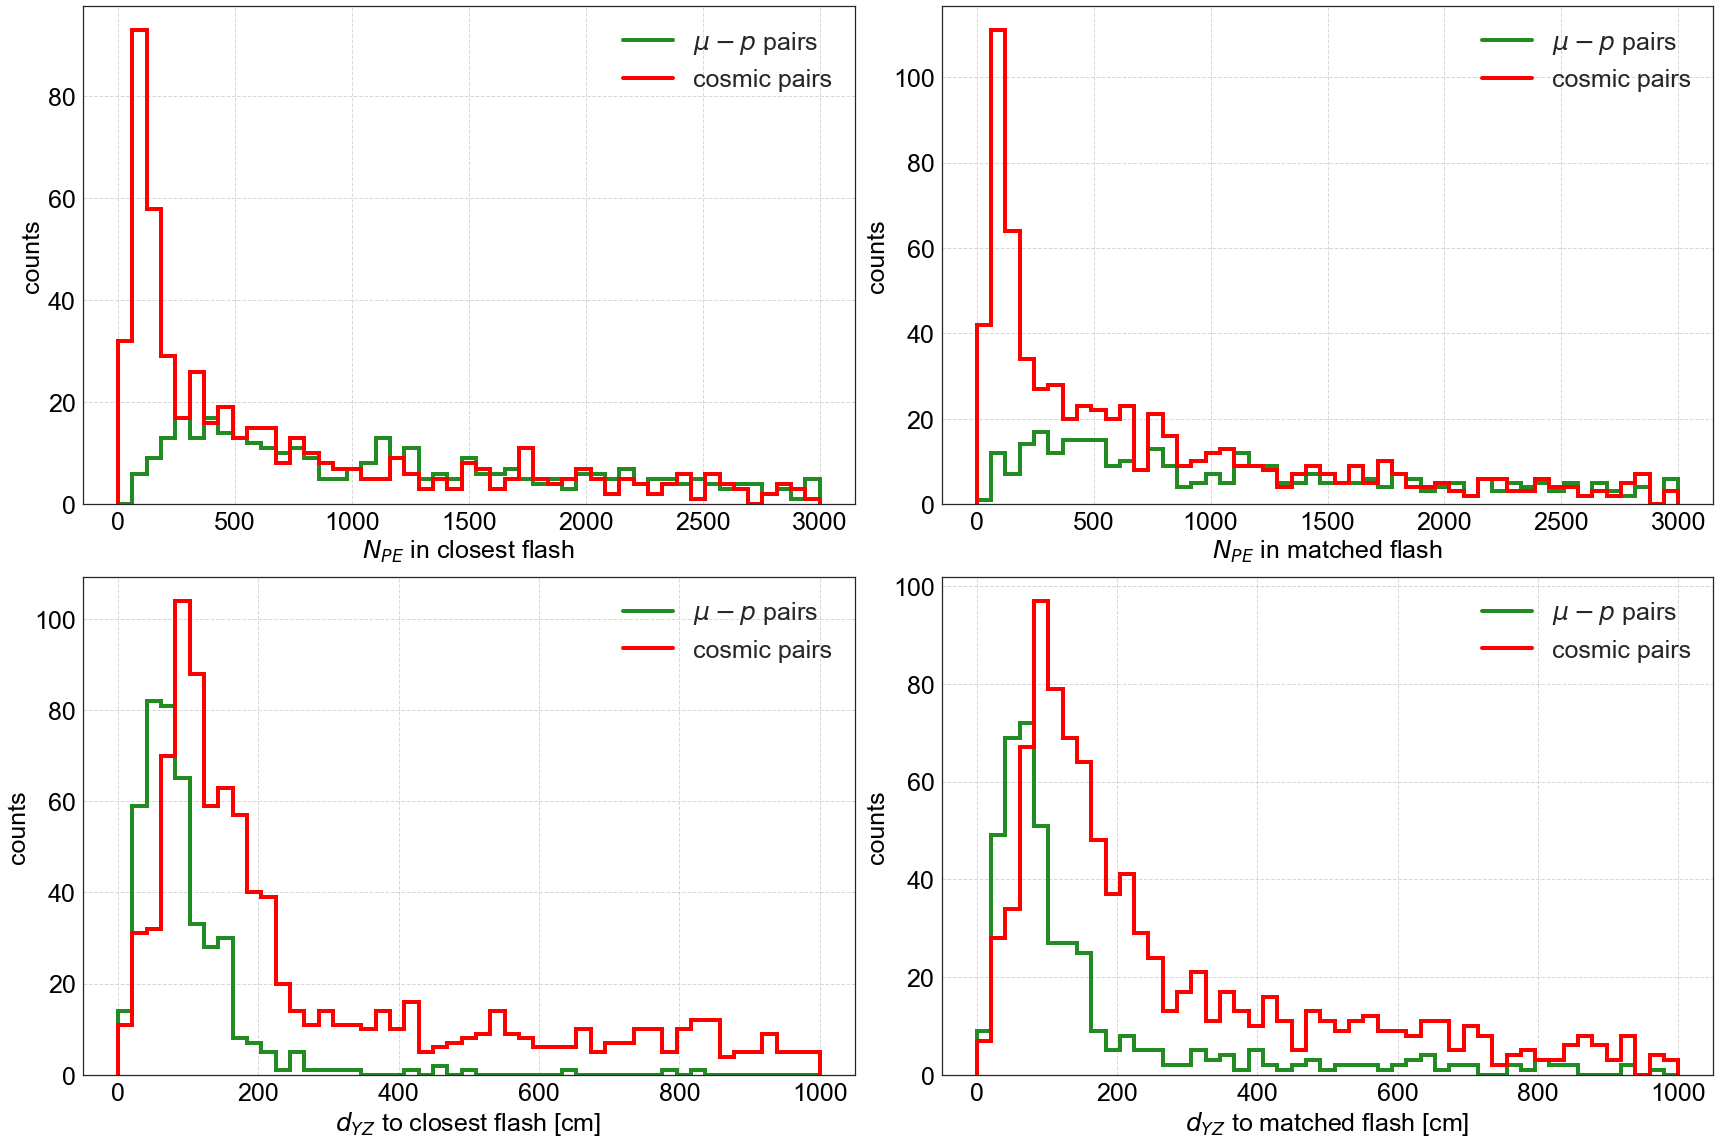

In [46]:
fig=plt.figure(figsize=(24,16))
for ivar,(var,xlabel,bins) in enumerate(zip(['ClosestFlash_TotalPE','MatchedFlash_TotalPE','ClosestFlash_YZdistance','MatchedFlash_YZdistance']
                   ,[r'$N_{PE}$ in closest flash ',r'$N_{PE}$ in matched flash ',r'$d_{YZ}$ to closest flash [cm] ',r'$d_{YZ}$ to matched flash [cm]']
                                            ,[linspace(0,3000,50),linspace(0,3000,50),linspace(0,1000,50),linspace(0,1000,50)])):
    ax = fig.add_subplot(2,2,ivar+1)
    for sam,slabel,scolor in zip([mup,cosmic]
                          ,['$\mu-p$ pairs','cosmic pairs']
                                 ,['forestgreen','red']):
        plt.hist(sam[var],bins=bins,histtype='step',linewidth=4,color=scolor);
        plt.plot([0,0],[0,0],color=scolor,linewidth=4,label=slabel)
    set_axes(ax,xlabel,'counts',do_add_legend=True,do_add_grid=True)

plt.tight_layout()

# my calculation of momentum vs. momentum calculator...

In [13]:
ovrelay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/from_interactive/prodgenie_bnb_nu_uboone_overlay_mcc8_v9_vertices.csv')
mup = ovrelay[ovrelay['1mu-1p']==True]
print len(mup),'pairs of 1mu-1p'

354 pairs of 1mu-1p


(array([   1.,    0.,    0.,    1.,    0.,    1.,    3.,   12.,   65.,  271.]),
 array([-4.905581 , -4.4099819, -3.9143828, -3.4187837, -2.9231846,
        -2.4275855, -1.9319864, -1.4363873, -0.9407882, -0.4451891,  0.05041  ]),
 <a list of 10 Patch objects>)

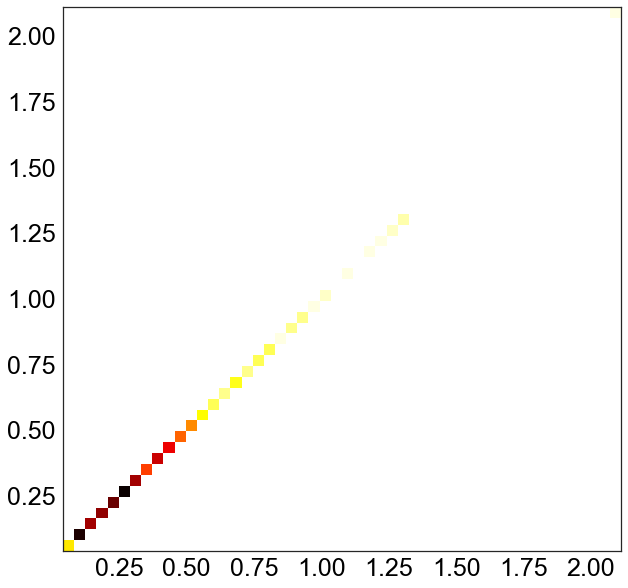

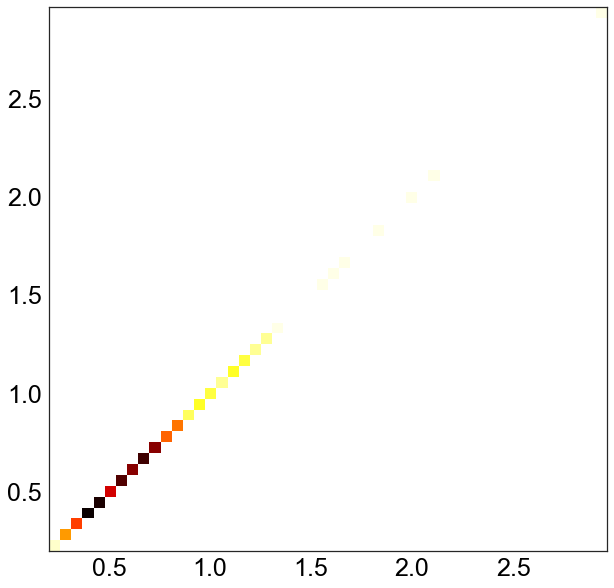

In [15]:
plot_2d_hist(mup.PmuHypothesisCalc,mup.reco_Pmu);
plot_2d_hist(mup.PpHypothesisCalc,mup.reco_Pp);
# plt.hist(mup.PmuHypothesisCalc-mup.reco_Pmu)
plt.hist(mup.PmuHypothesisCalc-mup.truth_Pmu)